# 1. Normality Tests

**Statistical tests that you can use to check if your data has a Gaussian distribution**

Tests whether a data sample has a Gaussian distribution.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).

Interpretation
* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

p > 0.05 : Gaussian

### 1.1 Shapiro-Wilk Test

In [1]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


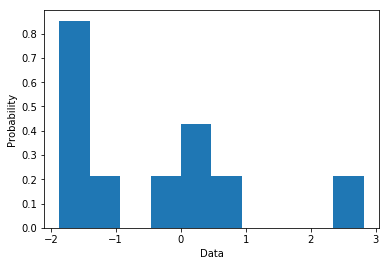

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.hist(data, density=True)
plt.ylabel('Probability')
plt.xlabel('Data');

### 1.2 D'Agostino's K^2 Test

In [8]:
from scipy.stats import normaltest
np.random.seed(42)
data = np.random.normal(size=1000)
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=2.576, p=0.276
Probably Gaussian


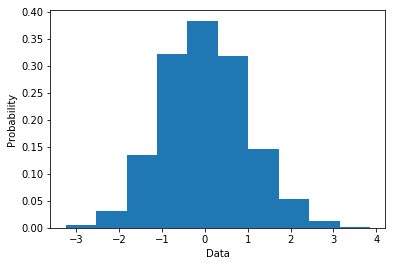

In [9]:
plt.hist(data, density=True)
plt.ylabel('Probability')
plt.xlabel('Data');

### 1.3 Anderson-Darling Test

In [12]:
from scipy.stats import anderson
data = np.random.normal(size=1000)
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.174
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


# 2. Correlation Tests

**Statistical tests that you can use to check if two samples are related.**

### 2.1 Pearson's Correlation Coefficient

Tests whether two samples have a linear relationship.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

p > 0.05 : independent

In [14]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


### 2.2 Spearman's Rank Correlation

Tests whether two samples have a monotonic relationship. 
[a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases]

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked

Interpretation
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

p > 0.05 : independent

In [15]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


### 2.3 Kendall's Rank Correlation

Tests whether two samples have a monotonic relationship. 

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked

Interpretation
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

p > 0.05 : independent

In [16]:
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.733, p=0.003
Probably dependent


### 2.4 Chi-Squared Test

Tests whether two categorical variables are related or independent. 

Assumptions:
* Observations used in the calculation of the contingency table are independent.
* 25 or more examples in each cell of the contingency table.
[a two-way frequency table, is a tabular mechanism with at least two rows and two columns used in statistics to present categorical data in terms of frequency counts]

Interpretation
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

p > 0.05 : independent

In [17]:
from scipy.stats import chi2_contingency
table = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


# 3. Stationary Tests

**Statistical tests that you can use to check if a time series is stationary or not**

### 3.1 Augmented Dickey-Fuller

Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive. 

Assumptions:
* Observations in are temporally ordered.

Interpretation
* H0: a unit root is present (series is non-stationary).
* H1: a unit root is not present (series is stationary).

p > 0.05 : non-stationary

In [18]:
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-0.366, p=0.916
Probably not Stationary


### 3.2 Kwiatkowski-Phillips-Schmidt-Shin

Tests whether a time series is trend stationary or not. 

Assumptions:
* Observations in are temporally ordered.

Interpretation
* H0: the time series is not trend-stationary.
* H1: the time series is trend-stationary.

p > 0.05 : non-stationary

In [19]:
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=0.410, p=0.073
Probably not Stationary


# 4. Parametric Statistical Hypothesis Tests

**Statistical tests that you can use to compare data samples.**

### 4.1 Student's t-test

Tests whether the means of two independent samples are significantly different.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation
* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

p > 0.05 : samples are similar

In [20]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


### 4.2 Paired Student's t-test

Tests whether the means of two independent samples are significantly different.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired.

Interpretation
* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

p > 0.05 : samples are similar

In [21]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


### 4.3 Analysis of Variance Test (ANOVA)

Tests whether the means of two independent samples are significantly different.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

Interpretation
* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

p > 0.05 : samples are similar

In [22]:
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


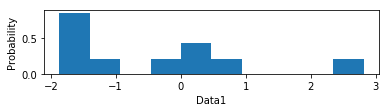

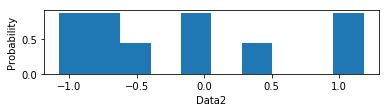

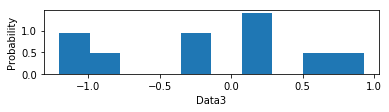

In [28]:
plt.figure(1)
plt.subplot(311)
plt.hist(data1, density=True)
plt.ylabel('Probability')
plt.xlabel('Data1');

plt.figure(2)
plt.subplot(312)
plt.hist(data2, density=True)
plt.ylabel('Probability')
plt.xlabel('Data2');

plt.figure(3)
plt.subplot(313)
plt.hist(data3, density=True)
plt.ylabel('Probability')
plt.xlabel('Data3');

### 4.4 Repeated Measures ANOVA Test

Tests whether the means of two or more paired samples are significantly different.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.
* Observations across each sample are paired.

Interpretation
* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.

p > 0.05 : samples are similar

# 5. Nonparametric Statistical Hypothesis Tests

**source:** [https://statisticsbyjim.com/hypothesis-testing/nonparametric-parametric-tests/]


* Parametric analyses to assess group means
* Nonparametric analyses to assess group medians
*


* 1-sample t-test **VS**	1-sample Sign, 1-sample Wilcoxon
* 2-sample t-test **VS**	Mann-Whitney test
* One-Way ANOVA	**VS**	Kruskal-Wallis, Mood’s median test
* Factorial DOE with a factor and a blocking variable	**VS**	Friedman test


**Parametric tests pros:**
1. Parametric tests can provide trustworthy results even with distributions that are skewed and nonnormal (due to Central Limit Theorem)
2. Parametric tests can provide trustworthy results when the groups have different amounts of variability (a nonparametric analysis typically must all have the same variability)
3. Parametric tests have greater statistical power

**Nonparametric tests pros:**
1. Nonparametric tests assess the median which can be better for some study areas
2. Nonparametric tests are valid when our sample size is small and your data are potentially nonnormal
3. Nonparametric tests can analyze ordinal data, ranked data, and outliers

***Parametric test is preferred over Nonparametric test***

### 5.1 Mann-Whitney U Test (or Wilcoxon rank-sum test)

Tests whether the distributions of two independent samples are equal or not.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation
* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

p > 0.05 : samples are similar

In [30]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.236
Probably the same distribution


### 5.2 Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

Interpretation
* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

p > 0.05 : samples are similar

In [29]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.508
Probably the same distribution


### 5.3 Kruskal-Wallis H Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.

Interpretation
* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

p > 0.05 : samples are similar

In [31]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


### 5.4 Friedman Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions:
* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

Interpretation
* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

p > 0.05 : samples are similar

In [32]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
